In [1]:
import pandas as pd
import numpy as np

In [4]:
pca = pd.read_csv("/content/clustered_anime_pca.csv", index_col=0)
pca.head()

,AnimeName,ClusterType,Point
0,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hat...,1,0.014119
1,&quot;Bungaku Shoujo&quot; Memoire,1,0.011198
2,&quot;Bungaku Shoujo&quot; Movie,1,0.023856
3,&quot;Eiji&quot;,1,0.000487
4,.hack//G.U. Returner,1,0.013632


In [5]:
tsne = pd.read_csv("/content/clustered_anime_tsne.csv", index_col=0)
tsne.head()

,AnimeName,ClusterType,Point
0,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hat...,1,0.006150
1,&quot;Bungaku Shoujo&quot; Memoire,1,0.007585
2,&quot;Bungaku Shoujo&quot; Movie,1,0.017425
3,&quot;Eiji&quot;,1,0.000000
4,.hack//G.U. Returner,1,0.001640


In [7]:
tsne[tsne.AnimeName == "Naruto"]

,AnimeName,ClusterType,Point
4826,Naruto,1,0.272653
12678,Naruto,2,0.148476
20530,Naruto,3,0.187833
28382,Naruto,4,0.162178


In [18]:
tsne[tsne.AnimeName == "Barakamon"]

,AnimeName,ClusterType,Point
595,Barakamon,1,0.187577
8447,Barakamon,2,0.047331
16299,Barakamon,3,0.020532
24151,Barakamon,4,0.050239


In [19]:
tsne[tsne.AnimeName == "Hunter x Hunter"]

,AnimeName,ClusterType,Point
2844,Hunter x Hunter,1,0.072571
10696,Hunter x Hunter,2,0.038470
18548,Hunter x Hunter,3,0.036692
26400,Hunter x Hunter,4,0.048711


In [21]:
tsne[tsne.AnimeName == "Neon Genesis Evangelion"]

,AnimeName,ClusterType,Point
4900,Neon Genesis Evangelion,1,0.191472
12752,Neon Genesis Evangelion,2,0.103739
20604,Neon Genesis Evangelion,3,0.075475
28456,Neon Genesis Evangelion,4,0.280802


In [22]:
tsne[tsne.AnimeName == "Mirai Nikki"]

,AnimeName,ClusterType,Point
4523,Mirai Nikki,1,0.045715
12375,Mirai Nikki,2,0.045818
20227,Mirai Nikki,3,0.012548
28079,Mirai Nikki,4,0.019866


**Route:** 

* Every anime has 4 cluster type and relevant points. Create a new dataframe and assign that cluster type to there which has highest point.

* Later, take anime name from user and find the cluster of anime. Then recommend random anime which belongs to that cluster. 


## t-SNE

In [34]:
anime_names_tsne = tsne.AnimeName.unique()
anime_names_tsne

array(['&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi',
       '&quot;Bungaku Shoujo&quot; Memoire',
       '&quot;Bungaku Shoujo&quot; Movie', ...,
       'xxxHOLiC Movie: Manatsu no Yoru no Yume', 'xxxHOLiC Rou',
       'xxxHOLiC Shunmuki'], dtype=object)

In [35]:
print("Shape of unique anime names: ", anime_names_tsne.shape)

Shape of unique anime names:  (7852,)


In [43]:
tsne[tsne.AnimeName == "Mirai Nikki"].Point

4523     0.045715
12375    0.045818
20227    0.012548
28079    0.019866
Name: Point, dtype: float64

In [49]:
# anime belongs 2nd cluster if cluster types are 1, 2, 3 and 4
np.argmax(tsne[tsne.AnimeName == "Mirai Nikki"].Point)

1

In [55]:
to_app = pd.DataFrame(np.zeros((anime_names_tsne.shape[0], 2)), columns=["AnimeName", "ClusterType"])
to_app.head()

,AnimeName,ClusterType
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [73]:
for i in range(len(anime_names_tsne)):
  animeName = anime_names_tsne[i]
  cluster_type = np.argmax(tsne[tsne.AnimeName == animeName].Point)
  to_app.AnimeName[i] = animeName
  to_app.ClusterType[i] = cluster_type

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [74]:
to_app.head()

,AnimeName,ClusterType
0,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hat...,3
1,&quot;Bungaku Shoujo&quot; Memoire,0
2,&quot;Bungaku Shoujo&quot; Movie,0
3,&quot;Eiji&quot;,3
4,.hack//G.U. Returner,1


In [77]:
print("Distribution of Cluster Types\n")
print(to_app.ClusterType.value_counts())

Distribution of Cluster Types

0    2857
3    2656
1    1668
2     671
Name: ClusterType, dtype: int64


## Visualize Cluster Distribution

In [78]:
import seaborn as sns

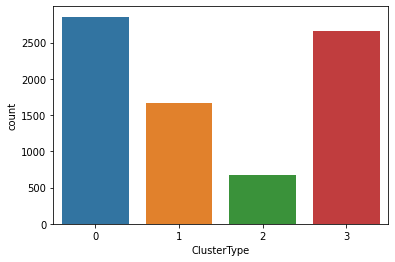

In [88]:
sns.countplot(x = to_app.ClusterType, data=to_app)

# Save Data

In [89]:
from google.colab import files

In [90]:
to_app.to_csv("/content/anime_recommender_app_data.csv")
files.download("/content/anime_recommender_app_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>